##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic regression: Predict fuel efficiency

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://tensorflow.google.cn/tutorials/keras/regression"><img src="https://tensorflow.google.cn/images/tf_logo_32px.png" />在 tensorFlow.google.cn 上查看</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/keras/regression.ipynb"><img src="https://tensorflow.google.cn/images/colab_logo_32px.png" />在 Google Colab 中运行</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/keras/regression.ipynb"><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png" />在 GitHub 上查看源代码</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/keras/regression.ipynb"><img src="https://tensorflow.google.cn/images/download_logo_32px.png" />下载 notebook</a>
  </td>
</table>

Note: 我们的 TensorFlow 社区翻译了这些文档。因为社区翻译是尽力而为， 所以无法保证它们是最准确的，并且反映了最新的
[官方英文文档](https://tensorflow.google.cn/?hl=en)。如果您有改进此翻译的建议， 请提交 pull request 到
[tensorflow/docs](https://github.com/tensorflow/docs) GitHub 仓库。要志愿地撰写或者审核译文，请加入
[docs-zh-cn@tensorflow.org Google Group](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-zh-cn)。

在 *回归 (regression)* 问题中，我们的目的是预测出如价格或概率这样连续值的输出。相对于*分类(classification)* 问题，*分类(classification)* 的目的是从一系列的分类出选择出一个分类 （如，给出一张包含苹果或橘子的图片，识别出图片中是哪种水果）。

本 notebook 使用经典的 [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) 数据集，构建了一个用来预测70年代末到80年代初汽车燃油效率的模型。为了做到这一点，我们将为该模型提供许多那个时期的汽车描述。这个描述包含：气缸数，排量，马力以及重量。

本示例使用 `tf.keras` API，相关细节请参阅 [本指南](https://tensorflow.google.cn/guide/keras)。

In [1]:
# 使用 seaborn 绘制矩阵图 (pairplot)
!pip install -q seaborn
!pip install -q pandas

In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

print(tf.__version__)

2.10.0


## Auto MPG 数据集

该数据集可以从 [UCI机器学习库](https://archive.ics.uci.edu/ml/) 中获取.


### 获取数据
首先下载数据集。

In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\xugang\\.keras\\datasets\\auto-mpg.data'

## Load CAZyme dataset.

In [3]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\caz.sub.train.csv'

## Load Pfam datasets.

In [160]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\pfam.sub.train.csv'

## Load KEGG datasets.

In [194]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\kegg.sub.train.csv'

## Load COG

In [227]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\cog.sub.train.csv'

## Load TIGRFAM

In [261]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\cogtig.sub.train.csv'

## Load KEGG + CAZyme

In [294]:
data_path2='d:\\a-document\sequencing_center_desktop\yanglab\dynamic_project\science.abm7841_data_s1\pathannotation\kegg.caz.sub.train.csv'

使用 pandas 导入数据集。

In [295]:

raw_dataset = pd.read_csv(data_path2)

dataset = raw_dataset.copy()
dataset.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F57,F58,F59,F60,F61,F62,F63,F64,F65,interaction
43,0.0,0.0,0.0,0.0,-0.042857,0.0,0.311508,-0.010714,0.15,0.0,...,-1,0,-1,0,0,0,0,0,0,3.091857
44,0.0,0.0,0.0,0.0,0.342857,0.0,0.310714,-0.189286,-0.15,0.0,...,0,0,0,0,0,0,0,0,0,0.656584
45,0.0,0.0,0.0,0.0,0.300000,0.0,0.622222,-0.200000,0.00,0.0,...,-1,0,-1,0,0,0,0,0,0,-20.695588
46,0.0,0.0,0.0,0.0,0.042857,0.0,-0.311508,0.010714,-0.15,0.0,...,1,0,1,0,0,0,0,0,0,3.251276
47,0.0,0.0,0.0,0.0,-0.300000,0.0,-0.622222,0.200000,0.00,0.0,...,1,0,1,0,0,0,0,0,0,2.406624


### 数据清洗

数据集中包括一些未知值。

In [296]:
dataset.isna().sum()

F1             0
F2             0
F3             0
F4             0
F5             0
              ..
F62            0
F63            0
F64            0
F65            0
interaction    0
Length: 66, dtype: int64

为了保证这个初始示例的简单性，删除这些行。

In [297]:
dataset = dataset.dropna()

`"Origin"` 列实际上代表分类，而不仅仅是一个数字。所以把它转换为独热码 （one-hot）:

In [298]:
#origin = dataset.pop('Origin')

In [299]:
#dataset['USA'] = (origin == 1)*1.0
#dataset['Europe'] = (origin == 2)*1.0
#dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F57,F58,F59,F60,F61,F62,F63,F64,F65,interaction
43,0.0,0.0,0.0,0.0,-0.042857,0.0,0.311508,-0.010714,0.15,0.0,...,-1,0,-1,0,0,0,0,0,0,3.091857
44,0.0,0.0,0.0,0.0,0.342857,0.0,0.310714,-0.189286,-0.15,0.0,...,0,0,0,0,0,0,0,0,0,0.656584
45,0.0,0.0,0.0,0.0,0.300000,0.0,0.622222,-0.200000,0.00,0.0,...,-1,0,-1,0,0,0,0,0,0,-20.695588
46,0.0,0.0,0.0,0.0,0.042857,0.0,-0.311508,0.010714,-0.15,0.0,...,1,0,1,0,0,0,0,0,0,3.251276
47,0.0,0.0,0.0,0.0,-0.300000,0.0,-0.622222,0.200000,0.00,0.0,...,1,0,1,0,0,0,0,0,0,2.406624


### 拆分训练数据集和测试数据集

现在需要将数据集拆分为一个训练数据集和一个测试数据集。

我们最后将使用测试数据集对模型进行评估。

In [748]:
predict=np.array([])
observe=np.array([])

### 分配数据

In [749]:
train_dataset = dataset.sample(frac=0.9,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([0, 3, 39, 44, 45], dtype='int64')

In [745]:
type(train_dataset)

pandas.core.frame.DataFrame

In [775]:
train_dataset = dataset.sample(frac=0.9,random_state=1)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([8, 9, 12, 37, 43], dtype='int64')

In [649]:
train_dataset = dataset.sample(frac=0.9,random_state=2)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([8, 15, 22, 40, 45], dtype='int64')

In [651]:
train_dataset = dataset.sample(frac=0.9,random_state=3)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([0, 3, 8, 24, 42], dtype='int64')

In [653]:
train_dataset = dataset.sample(frac=0.9,random_state=4)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([1, 5, 23, 40, 46], dtype='int64')

In [655]:
train_dataset = dataset.sample(frac=0.9,random_state=5)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([9, 14, 16, 35, 38], dtype='int64')

In [657]:
train_dataset = dataset.sample(frac=0.9,random_state=6)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([9, 10, 20, 35, 42], dtype='int64')

In [776]:
train_dataset = dataset.sample(frac=0.9,random_state=7)
test_dataset = dataset.drop(train_dataset.index)

In [777]:
test_dataset.index

Int64Index([3, 4, 19, 25, 47], dtype='int64')

In [780]:
train_dataset = dataset.sample(frac=0.9,random_state=17)
test_dataset = dataset.drop(train_dataset.index)

In [781]:
test_dataset.index

Int64Index([6, 15, 22, 44, 47], dtype='int64')

In [782]:
train_dataset = dataset.sample(frac=0.9,random_state=8)
test_dataset = dataset.drop(train_dataset.index)

In [783]:
test_dataset.index

Int64Index([3, 5, 20, 26, 41], dtype='int64')

In [784]:
train_dataset = dataset.sample(frac=0.9,random_state=9)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([1, 22, 28, 40, 46], dtype='int64')

In [786]:
train_dataset = dataset.sample(frac=0.9,random_state=10)
test_dataset = dataset.drop(train_dataset.index)
test_dataset.index

Int64Index([0, 9, 15, 28, 36], dtype='int64')

Int64Index([35, 23, 42, 40, 45, 20,  3, 30,  7,  6, 37,  2, 38, 32, 10, 21, 34,
            27, 18, 31,  1, 12, 33, 43, 26,  5, 13, 22, 19, 17, 14,  4, 39, 24,
            11, 16, 46, 44, 47,  8, 41, 29, 25],
           dtype='int64')

Int64Index([0, 9, 15, 28, 36], dtype='int64')

### dobule the train data, If not skip the step.

In [677]:
dataset
#train_dataset=pd.concat([train_dataset,train_dataset],axis=0)
train_dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F57,F58,F59,F60,F61,F62,F63,F64,F65,interaction
33,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,-4.891075
23,0.00,0.00,0.00,0.00,-0.539400,0.00,-0.290000,-0.307400,-0.29,0.00,...,0,0,0,0,0,0,0,-1,0,4.276388
38,0.23,-0.09,-0.09,0.00,0.000000,0.00,0.404706,0.305882,0.23,0.00,...,0,0,0,0,0,0,0,0,0,0.502239
36,-0.23,0.09,0.09,0.00,0.000000,0.00,-0.404706,-0.305882,-0.23,0.00,...,0,0,0,0,0,0,0,0,0,1.503372
2,0.00,0.10,0.10,-0.19,-0.233846,0.00,-0.295825,0.125459,-0.09,0.00,...,0,0,0,-1,0,-2,-1,-1,-1,2.061870
3,0.00,0.10,0.10,0.00,-0.330000,0.00,-1.070326,-0.380073,-0.23,0.00,...,0,-1,0,0,0,0,0,0,0,10.838264
31,0.00,0.00,0.00,0.00,0.150000,0.00,0.545641,0.150000,-0.02,0.00,...,0,0,0,0,1,0,0,0,0,-0.361771
26,0.00,0.15,0.00,0.00,0.150000,0.00,0.549324,0.222973,0.15,0.15,...,0,0,0,0,0,0,0,0,0,2.981602
44,0.00,0.00,0.00,0.00,0.342857,0.00,0.310714,-0.189286,-0.15,0.00,...,0,0,0,0,0,0,0,0,0,0.656584
27,0.00,0.15,0.00,0.00,0.150000,0.00,-0.080676,-0.227027,0.15,0.15,...,0,0,0,0,0,0,0,0,0,2.176199


In [678]:
train_dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F57,F58,F59,F60,F61,F62,F63,F64,F65,interaction
33,0.00,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,-4.891075
23,0.00,0.00,0.00,0.00,-0.539400,0.00,-0.290000,-0.307400,-0.29,0.00,...,0,0,0,0,0,0,0,-1,0,4.276388
38,0.23,-0.09,-0.09,0.00,0.000000,0.00,0.404706,0.305882,0.23,0.00,...,0,0,0,0,0,0,0,0,0,0.502239
36,-0.23,0.09,0.09,0.00,0.000000,0.00,-0.404706,-0.305882,-0.23,0.00,...,0,0,0,0,0,0,0,0,0,1.503372
2,0.00,0.10,0.10,-0.19,-0.233846,0.00,-0.295825,0.125459,-0.09,0.00,...,0,0,0,-1,0,-2,-1,-1,-1,2.061870
3,0.00,0.10,0.10,0.00,-0.330000,0.00,-1.070326,-0.380073,-0.23,0.00,...,0,-1,0,0,0,0,0,0,0,10.838264
31,0.00,0.00,0.00,0.00,0.150000,0.00,0.545641,0.150000,-0.02,0.00,...,0,0,0,0,1,0,0,0,0,-0.361771
26,0.00,0.15,0.00,0.00,0.150000,0.00,0.549324,0.222973,0.15,0.15,...,0,0,0,0,0,0,0,0,0,2.981602
44,0.00,0.00,0.00,0.00,0.342857,0.00,0.310714,-0.189286,-0.15,0.00,...,0,0,0,0,0,0,0,0,0,0.656584
27,0.00,0.15,0.00,0.00,0.150000,0.00,-0.080676,-0.227027,0.15,0.15,...,0,0,0,0,0,0,0,0,0,2.176199


In [679]:
test_dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F57,F58,F59,F60,F61,F62,F63,F64,F65,interaction
8,0.0,0.00,0.00,0.0,-0.000670,0.00,-0.109239,0.024418,0.00,-0.13,...,0,0,0,0,0,0,0,0,0,3.345386
9,0.0,-0.18,0.00,0.0,-0.081000,-0.18,0.126739,-0.076341,-0.05,0.00,...,0,0,0,0,0,0,0,0,0,-15.650074
12,0.0,0.00,0.00,0.0,-0.399400,0.00,0.270000,-0.167400,-0.15,0.00,...,0,0,0,0,0,0,0,-1,0,-1.881543
37,0.0,0.09,0.09,0.0,0.000000,0.00,0.150000,0.100000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,-5.237525
43,0.0,0.00,0.00,0.0,-0.042857,0.00,0.311508,-0.010714,0.15,0.00,...,-1,0,-1,0,0,0,0,0,0,3.091857


### 数据检查

快速查看训练集中几对列的联合分布。

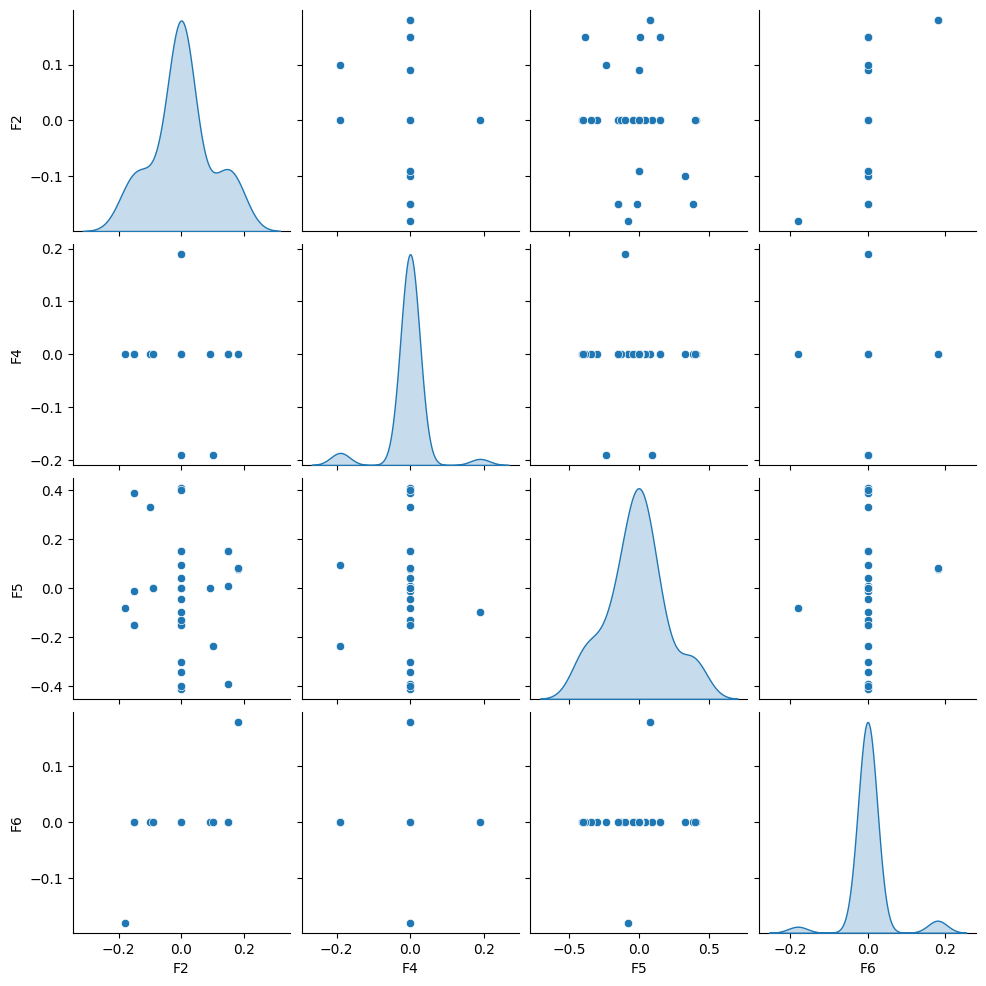

In [714]:
sns.pairplot(train_dataset[["F2", "F4", "F5", "F6"]], diag_kind="kde")

也可以查看总体的数据统计:

In [750]:
train_stats = train_dataset.describe()
train_stats.pop("interaction")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
F1,43.0,-5.348837e-03,0.061231,-0.2300,0.00,0.0,0.000000,0.2300
F2,43.0,1.290957e-18,0.092839,-0.1800,0.00,0.0,0.000000,0.1800
F3,43.0,0.000000e+00,0.035322,-0.1000,0.00,0.0,0.000000,0.1000
F4,43.0,-4.418605e-03,0.050582,-0.1900,0.00,0.0,0.000000,0.1900
F5,43.0,-1.271403e-02,0.227083,-0.5394,-0.14,0.0,0.088577,0.5394
...,...,...,...,...,...,...,...,...
F61,43.0,0.000000e+00,0.308607,-1.0000,0.00,0.0,0.000000,1.0000
F62,43.0,-4.651163e-02,0.532447,-2.0000,0.00,0.0,0.000000,2.0000
F63,43.0,-2.325581e-02,0.266223,-1.0000,0.00,0.0,0.000000,1.0000
F64,43.0,-2.325581e-02,0.511225,-1.0000,0.00,0.0,0.000000,1.0000


### 从标签中分离特征

将特征值从目标值或者"标签"中分离。 这个标签是你使用训练模型进行预测的值。

In [751]:
train_labels = train_dataset.pop('interaction')
test_labels = test_dataset.pop('interaction')

### 数据规范化

再次审视下上面的 `train_stats` 部分，并注意每个特征的范围有什么不同。

使用不同的尺度和范围对特征归一化是好的实践。尽管模型*可能* 在没有特征归一化的情况下收敛，它会使得模型训练更加复杂，并会造成生成的模型依赖输入所使用的单位选择。

注意：尽管我们仅仅从训练集中有意生成这些统计数据，但是这些统计信息也会用于归一化的测试数据集。我们需要这样做，将测试数据集放入到与已经训练过的模型相同的分布中。

In [752]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [753]:
normed_train_data = train_dataset
normed_test_data = test_dataset

In [754]:
normed_train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F56,F57,F58,F59,F60,F61,F62,F63,F64,F65
29,0.00,-0.15,0.00,0.00,-0.150000,0.00,0.080676,0.227027,-0.15,-0.15,...,0,0,0,0,0,0,0,0,0,0
4,0.00,0.00,0.00,-0.19,0.096154,0.00,0.774501,0.505532,0.14,0.00,...,1,0,1,0,-1,0,-2,-1,-1,-1
26,0.00,0.15,0.00,0.00,0.150000,0.00,0.549324,0.222973,0.15,0.15,...,0,0,0,0,0,0,0,0,0,0
30,0.00,0.00,0.00,0.00,0.150000,0.00,0.545641,0.150000,-0.02,0.00,...,0,0,0,0,0,1,0,0,0,0
32,0.00,0.00,0.00,0.00,-0.150000,0.00,-0.545641,-0.150000,0.02,0.00,...,0,0,0,0,0,-1,0,0,0,0
37,0.00,0.09,0.09,0.00,0.000000,0.00,0.150000,0.100000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
34,0.00,0.00,0.00,0.00,-0.150000,0.00,-0.545641,-0.150000,0.02,0.00,...,0,0,0,0,0,-1,0,0,0,0
40,0.00,-0.09,-0.09,0.00,0.000000,0.00,-0.150000,-0.100000,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
7,0.00,-0.18,0.00,0.00,-0.080330,-0.18,0.235978,-0.100758,-0.05,0.13,...,0,0,0,0,0,0,0,0,0,0
10,0.00,0.18,0.00,0.00,0.080330,0.18,-0.235978,0.100758,0.05,-0.13,...,0,0,0,0,0,0,0,0,0,0


我们将会使用这个已经归一化的数据来训练模型。

警告: 用于归一化输入的数据统计（均值和标准差）需要反馈给模型从而应用于任何其他数据，以及我们之前所获得独热码。这些数据包含测试数据集以及生产环境中所使用的实时数据。

## 模型

### 构建模型

让我们来构建我们自己的模型。这里，我们将会使用一个“顺序”模型，其中包含两个紧密相连的隐藏层，以及返回单个、连续值得输出层。模型的构建步骤包含于一个名叫 'build_model' 的函数中，稍后我们将会创建第二个模型。 两个密集连接的隐藏层。

In [755]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [756]:
model = build_model()

### 检查模型

使用 `.summary` 方法来打印该模型的简单描述。

In [757]:
model.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_242 (Dense)           (None, 64)                4224      
                                                                 
 dense_243 (Dense)           (None, 128)               8320      
                                                                 
 dense_244 (Dense)           (None, 256)               33024     
                                                                 
 dense_245 (Dense)           (None, 64)                16448     
                                                                 
 dense_246 (Dense)           (None, 32)                2080      
                                                                 
 dense_247 (Dense)           (None, 1)                 33        
                                                                 
Total params: 64,129
Trainable params: 64,129
Non-tra

现在试用下这个模型。从训练数据中批量获取‘10’条例子并对这些例子调用 `model.predict` 。


In [758]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 57ms/step


array([[-0.08051348],
       [-0.16920651],
       [-0.07098142],
       [-0.09297203],
       [-0.15280445],
       [-0.06085069],
       [-0.15280445],
       [-0.06528464],
       [-0.08672121],
       [-0.07122102]], dtype=float32)

它似乎在工作，并产生了预期的形状和类型的结果

### 训练模型

对模型进行1000个周期的训练，并在 `history` 对象中记录训练和验证的准确性。

In [759]:
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

使用 `history` 对象中存储的统计信息可视化模型的训练进度。

In [760]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.466608,0.513564,2.466608,40.594711,5.109773,40.594711,995
996,2.638621,0.782875,2.638621,33.070530,4.190958,33.070530,996
997,2.433137,0.541526,2.433137,35.192852,4.491398,35.192852,997
998,2.403712,0.475952,2.403712,34.318020,4.363545,34.318020,998
999,2.397812,0.452845,2.397812,36.586365,4.652300,36.586365,999


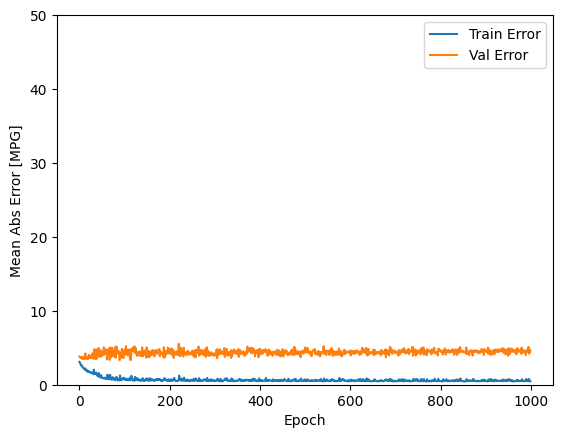

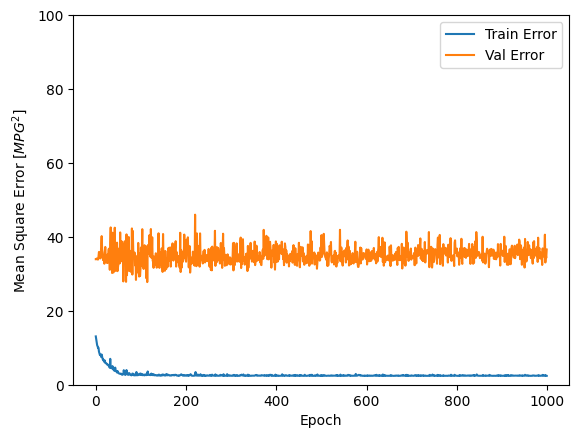

In [761]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,50])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()


plot_history(history)

该图表显示在约100个 epochs 之后误差非但没有改进，反而出现恶化。 让我们更新 `model.fit` 调用，当验证值没有提高上是自动停止训练。
我们将使用一个 *EarlyStopping callback* 来测试每个 epoch 的训练条件。如果经过一定数量的 epochs 后没有改进，则自动停止训练。

你可以从[这里](https://tensorflow.google.cn/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping)学习到更多的回调。


...........

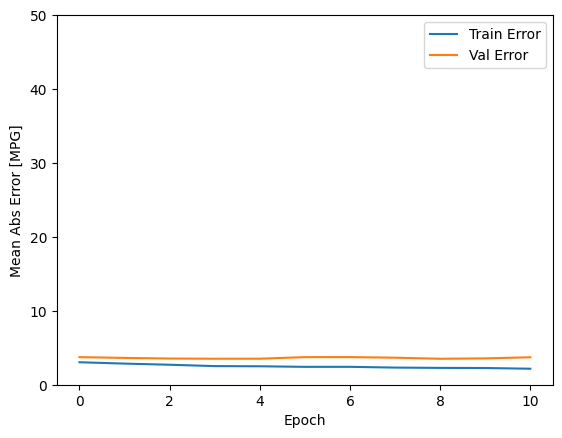

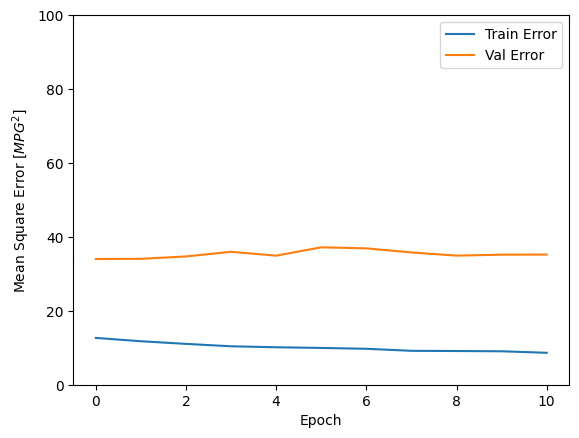

In [762]:
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

如图所示，验证集中的平均的误差通常在 +/- 2 MPG左右。 这个结果好么？ 我们将决定权留给你。

让我们看看通过使用 **测试集** 来泛化模型的效果如何，我们在训练模型时没有使用测试集。这告诉我们，当我们在现实世界中使用这个模型时，我们可以期望它预测得有多好。

In [763]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

1/1 - 0s - loss: 132.7241 - mae: 7.2962 - mse: 132.7241 - 18ms/epoch - 18ms/step
Testing set Mean Abs Error:  7.30 MPG


In [764]:
normed_test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F56,F57,F58,F59,F60,F61,F62,F63,F64,F65
0,0.00,-0.1,-0.1,0.19,0.233846,0.0,0.295825,-0.125459,0.09,0.0,...,0,0,0,0,1,0,2,1,1,1
3,0.00,0.1,0.1,0.00,-0.330000,0.0,-1.070326,-0.380073,-0.23,0.0,...,-1,0,-1,0,0,0,0,0,0,0
39,0.23,0.0,0.0,0.00,0.000000,0.0,0.554706,0.405882,0.23,0.0,...,0,0,0,0,0,0,0,0,0,0
44,0.00,0.0,0.0,0.00,0.342857,0.0,0.310714,-0.189286,-0.15,0.0,...,0,0,0,0,0,0,0,0,0,0
45,0.00,0.0,0.0,0.00,0.300000,0.0,0.622222,-0.200000,0.00,0.0,...,0,-1,0,-1,0,0,0,0,0,0


### 做预测
 
最后，使用测试集中的数据预测 MPG 值:

1/1 [==============================] - 0s 17ms/step


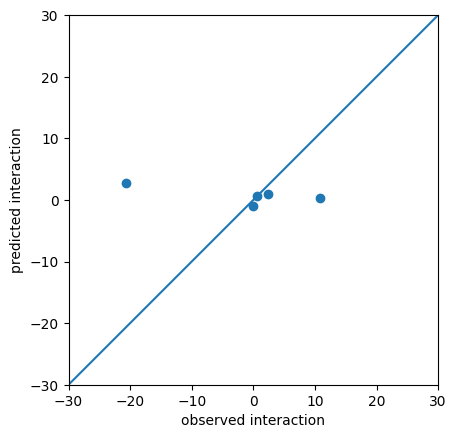

In [774]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('observed interaction')
plt.ylabel('predicted interaction')
plt.axis('equal')
plt.axis('square')
plt.xlim([-30,30])
plt.ylim([-30,30])
_ = plt.plot([-100, 100], [-100, 100])


In [766]:
data_path2

'd:\\a-document\\sequencing_center_desktop\\yanglab\\dynamic_project\\science.abm7841_data_s1\\pathannotation\\kegg.caz.sub.train.csv'

In [767]:
print(test_labels)
print(type(test_labels))
print(test_predictions)
print(type(test_predictions))

0     -0.024020
3     10.838264
39     2.459868
44     0.656584
45   -20.695588
Name: interaction, dtype: float64
<class 'pandas.core.series.Series'>
[-0.957622    0.32199052  0.89099354  0.64010483  2.7499921 ]
<class 'numpy.ndarray'>


### obtain the ture interaction

In [768]:
test_labels.values

array([ -0.02402018,  10.83826415,   2.45986785,   0.65658397,
       -20.69558784])

### obtain the predict interaction

In [769]:
test_predictions

array([-0.957622  ,  0.32199052,  0.89099354,  0.64010483,  2.7499921 ],
      dtype=float32)

In [770]:
my_array=np.array([test_labels.values,test_predictions])

#df=pd.DataFrame(my_array,columns=['Observed','Predicted'])

In [771]:
np.corrcoef(test_labels.values,test_predictions)[[1]]

array([[-0.73695244,  1.        ]])

这看起来我们的模型预测得相当好。我们来看下误差分布。

In [772]:
predict=np.append(predict,test_predictions)
observe=np.append(observe,test_labels.values)

In [738]:
predict

array([-1.72235703,  2.81108665, -0.83871722,  2.19190216,  3.78381896,
        2.0670507 ,  1.34435332,  2.4446671 ,  1.08378911,  7.37774277])

In [739]:
observe

array([ -0.02402018,  10.83826415, -15.65007395,  -4.73755393,
         1.48037583,   4.27638796,   1.50337173,   2.45986785,
         0.65658397, -20.69558784])

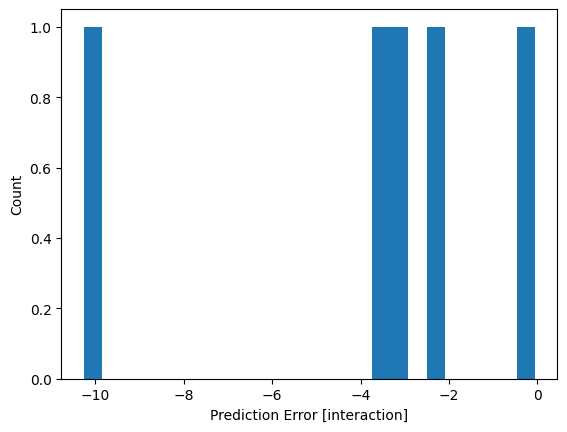

In [625]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [interaction]")
_ = plt.ylabel("Count")

它不是完全的高斯分布，但我们可以推断出，这是因为样本的数量很小所导致的。

## 结论

本笔记本 (notebook) 介绍了一些处理回归问题的技术。

* 均方误差（MSE）是用于回归问题的常见损失函数（分类问题中使用不同的损失函数）。
* 类似的，用于回归的评估指标与分类不同。 常见的回归指标是平均绝对误差（MAE）。
* 当数字输入数据特征的值存在不同范围时，每个特征应独立缩放到相同范围。
* 如果训练数据不多，一种方法是选择隐藏层较少的小网络，以避免过度拟合。
* 早期停止是一种防止过度拟合的有效技术。